## Типы задач машинного обучения
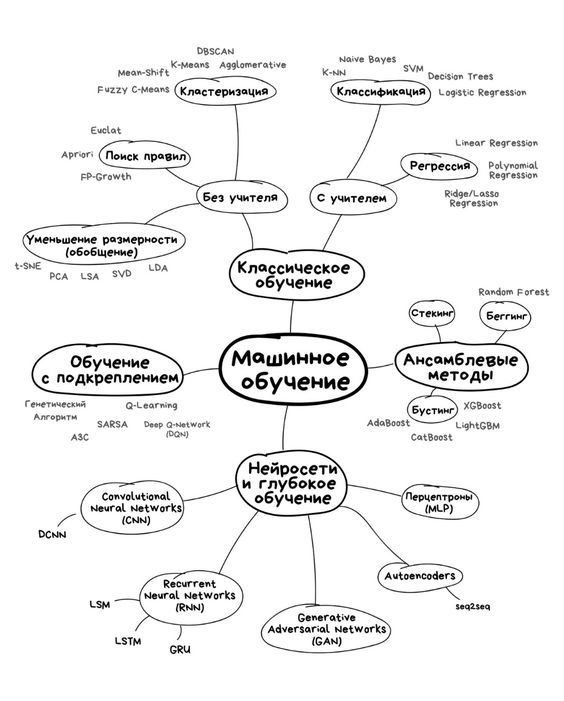

### Linear Regression 

#### y=ax+b

In [5]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
RS = 42
np.random.seed(RS)

x = np.linspace(0, 10, 100)
y = 3 * x + 7 + np.random.normal(size=100)


def create_regression_line(x, a, b):
    return a * x + b


def calculate_mse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()


a_init = 3
b_init = 7

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y, mode="markers", name="Data"))

fig.add_trace(
    go.Scatter(
        x=x,
        y=create_regression_line(x, a_init, b_init),
        mode="lines",
        name="Regression Line",
    )
)

initial_mse = calculate_mse(y, create_regression_line(x, a_init, b_init))

fig.add_annotation(
    x=0.5,
    y=1.05,
    xref="paper",
    yref="paper",
    text=f"Mean Squared Error: {initial_mse:.2f}",
    showarrow=False,
    font=dict(size=16, color="red"),
    align="center",
    bgcolor="white",
    bordercolor="black",
    borderpad=4,
)

fig.update_layout(
    sliders=[
        {
            "pad": {"t": 50},
            "len": 0.4,
            "x": 0.1,
            "y": 0,
            "currentvalue": {"prefix": "Slope a: "},
            "steps": [
                {
                    "label": f"{a:.2f}",
                    "method": "update",
                    "args": [
                        {"y": [y, create_regression_line(x, a, b_init)]},
                        {
                            "annotations": [
                                {
                                    "x": 0.5,
                                    "y": 1.05,
                                    "xref": "paper",
                                    "yref": "paper",
                                    "text": f"Mean Squared Error: {calculate_mse(y, create_regression_line(x, a, b_init)):.2f}",
                                    "showarrow": False,
                                    "font": {"size": 16, "color": "red"},
                                    "align": "center",
                                    "bgcolor": "white",
                                    "bordercolor": "black",
                                    "borderpad": 4,
                                }
                            ]
                        },
                    ],
                }
                for a in np.linspace(0, 6, 30)
            ],
        },
        {
            "pad": {"t": 50},
            "len": 0.4,
            "x": 0.6,
            "y": 0,
            "currentvalue": {"prefix": "Intercept b: "},
            "steps": [
                {
                    "label": f"{b:.2f}",
                    "method": "update",
                    "args": [
                        {"y": [y, create_regression_line(x, a_init, b)]},
                        {
                            "annotations": [
                                {
                                    "x": 0.5,
                                    "y": 1.05,
                                    "xref": "paper",
                                    "yref": "paper",
                                    "text": f"Mean Squared Error: {calculate_mse(y, create_regression_line(x, a_init, b)):.2f}",
                                    "showarrow": False,
                                    "font": {"size": 16, "color": "red"},
                                    "align": "center",
                                    "bgcolor": "white",
                                    "bordercolor": "black",
                                    "borderpad": 4,
                                }
                            ]
                        },
                    ],
                }
                for b in np.linspace(0, 14, 30)
            ],
        },
    ]
)

fig.update_layout(
    title="Interactive Linear Regression with MSE", xaxis_title="X", yaxis_title="Y"
)

fig.show()

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

In [7]:
np.random.seed(RS)

n_samples = 100
square_meters = np.random.normal(100, 20, n_samples).astype(int)
num_rooms = np.random.randint(1, 5, n_samples)
num_bathrooms = np.random.randint(1, 3, n_samples)
floor = np.random.randint(1, 16, n_samples)
total_floors = floor + np.random.randint(0, 5, n_samples)
age_of_building = np.random.randint(0, 100, n_samples)
distance_to_city_center = np.random.uniform(0.5, 20, n_samples).round(1)
is_renovated = np.random.choice([0, 1], n_samples)

base_price = 100000
price = (
    base_price
    + square_meters * 1000
    + num_rooms * 5000
    + num_bathrooms * 2000
    - floor * 100
    + (total_floors - floor) * 300
    - age_of_building * 100
    - distance_to_city_center * 2000
    + is_renovated * 15000
)
price = np.round(price, -3)

data = pd.DataFrame(
    {
        "Square Meters": square_meters,
        "Number of Rooms": num_rooms,
        "Number of Bathrooms": num_bathrooms,
        "Floor": floor,
        "Total Floors": total_floors,
        "Age of Building": age_of_building,
        "Distance to City Center (km)": distance_to_city_center,
        "Renovated": is_renovated,
        "Price ($)": price,
    }
)

data.head()

,Square Meters,Number of Rooms,Number of Bathrooms,Floor,Total Floors,Age of Building,Distance to City Center (km),Renovated,Price ($)
0,109,1,2,2,2,64,13.9,0,184000.0
1,97,2,1,5,6,32,16.8,0,172000.0
2,112,1,1,14,18,39,17.4,0,180000.0
3,130,1,2,1,2,73,16.9,1,213000.0
4,95,3,1,12,13,42,8.8,0,189000.0


In [8]:
from sklearn.model_selection import train_test_split

x_data = data.drop("Price ($)", axis=1)
y_data = data["Price ($)"]

X_train, X_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=RS
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 8), (20, 8), (80,), (20,))

In [9]:
class LinearRegressionAnalytical:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.coefficients = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.coefficients

In [10]:
class LinearRegressionGradientDescent:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.mse_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            mse = (1 / n_samples) * np.sum((y - y_predicted) ** 2)
            self.mse_history.append(mse)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

    def plot_mse(self):
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 4))
        sns.lineplot(x=range(self.num_iterations), y=self.mse_history, color="blue")
        plt.xlabel("Iterations")
        plt.ylabel("Mean Squared Error")
        plt.title("MSE over Iterations")
        plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
anal_lin_reg = LinearRegressionAnalytical()
grad_lin_reg = LinearRegressionGradientDescent()
lin_reg = LinearRegression()

In [13]:
anal_lin_reg.fit(X_train, y_train)
grad_lin_reg.fit(X_train, y_train)
lin_reg.fit(X_train, y_train)

y_pred_anal = anal_lin_reg.predict(X_test)
y_pred_grad = grad_lin_reg.predict(X_test)
y_pred_sklearn = lin_reg.predict(X_test)

print("Аналитическое решение:", y_pred_anal)
print("Градиентный спуск:", y_pred_grad)
print("Sklearn Linear Regression:", y_pred_sklearn)

/var/folders/fy/n9k_s82560sgbs35d90h0dmw0000gn/T/ipykernel_73935/2857325110.py:23: RuntimeWarning:

invalid value encountered in subtract



Аналитическое решение: [192230.69278296 198229.66515245 218379.96347408 153289.72949132
 152686.80648807 184203.38962664 219689.26539745 167237.8753046
 205526.82348449 183702.83044958 158810.63046997 157328.14772398
 217259.75070903 193611.74756004 191352.71847765 189189.92005336
 210723.80620502 188648.46276832 190980.41185219 236926.53206568]
Градиентный спуск: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
Sklearn Linear Regression: [192230.69278295 198229.66515244 218379.96347408 153289.72949131
 152686.80648807 184203.38962664 219689.26539744 167237.8753046
 205526.82348448 183702.83044958 158810.63046997 157328.14772398
 217259.75070903 193611.74756003 191352.71847765 189189.92005335
 210723.80620502 188648.46276831 190980.41185218 236926.53206567]


### Anal method

In [14]:
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
coefficients = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train

X_b.T 

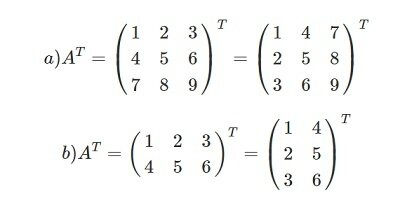

X_b.T @ X_b

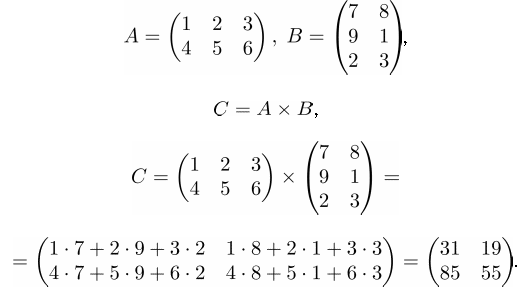

np.linalg.inv(X_b.T @ X_b)

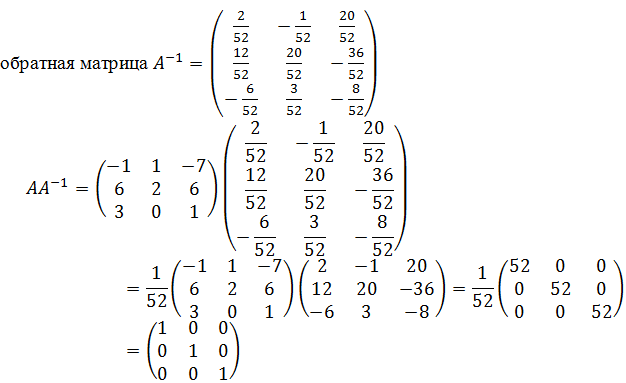

np.linalg.inv(X_b.T @ X_b) <--- @ X_b.T @ y_train

In [15]:
coefficients

array([99923.35609891,  1001.52848762,  4975.63260379,  2052.95350126,
        -418.30732326,   307.08997871,  -101.14978179, -1998.03235132,
       15055.92534502])

In [16]:
X_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

X_b @ coefficients

array([192230.69278296, 198229.66515245, 218379.96347408, 153289.72949132,
       152686.80648807, 184203.38962664, 219689.26539745, 167237.8753046 ,
       205526.82348449, 183702.83044958, 158810.63046997, 157328.14772398,
       217259.75070903, 193611.74756004, 191352.71847765, 189189.92005336,
       210723.80620502, 188648.46276832, 190980.41185219, 236926.53206568])

### Grad method

In [29]:
n_samples, n_features = X_train.shape
weights = np.zeros(n_features)
bias = 0
learning_rate = 0.01

y_predicted = np.dot(X_train, weights) + bias

print("y_predicted = ", y_predicted)
print("\n-------------------------------------------------------------------\n")

for _ in range(3):
    dw = (1 / n_samples) * np.dot(X_train.T, (y_predicted - y_train))
    db = (1 / n_samples) * np.sum(y_predicted - y_train)

    print(f"dw = {dw}\n\ndb= {db}")
    print("\n-------------------------------------------------------------------\n")

    weights -= learning_rate * dw
    bias -= learning_rate * db

    print(f"weights = {weights}\n\nbias = {bias}")
    print("\n-------------------------------------------------------------------\n")

    y_predicted = np.dot(X_train, weights) + bias

    print("y_predicted = ", y_predicted)
    print("\n-------------------------------------------------------------------\n")

y_predicted =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]

-------------------------------------------------------------------

dw = [-19518612.5    -543937.5    -307462.5   -1502287.5   -1937112.5
 -10255475.    -1779051.25   -102937.5 ]

db= -197337.5

-------------------------------------------------------------------

weights = [195186.125    5439.375    3074.625   15022.875   19371.125  102554.75
  17790.5125   1029.375 ]

bias = 1973.375

-------------------------------------------------------------------

y_predicted =  [32076649.13625 22493217.84625 18180529.805   21419759.36
 20413025.51625 27129289.9525  32410970.045   30283232.33875
 31824022.13125 25133796.85625 18047719.5475  29847779.10125
 23379723.98125 26355742.51125 19212536.07    23569767.335
 27380095.29625 27127562.5

### Scale

In [31]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
# scaler.inverse_transform(X_train_scale)

In [32]:
data = {
    "Feature1": np.random.randint(1, 100, 10),
    "Feature2": np.random.randint(1, 10, 10),
}
df = pd.DataFrame(data)


def min_max_scale(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)


df_min_max_scaled = df.copy()
df_min_max_scaled["Feature1"] = min_max_scale(df["Feature1"])
df_min_max_scaled["Feature2"] = min_max_scale(df["Feature2"])


def robust_scale(column):
    median_val = column.median()
    q75, q25 = np.percentile(column, [75, 25])
    iqr = q75 - q25
    return (column - median_val) / iqr


df_robust_scaled = df.copy()
df_robust_scaled["Feature1"] = robust_scale(df["Feature1"])
df_robust_scaled["Feature2"] = robust_scale(df["Feature2"])


def standard_scale(column):
    mean_val = column.mean()
    std_val = column.std()
    return (column - mean_val) / std_val


df_standard_scaled = df.copy()
df_standard_scaled["Feature1"] = standard_scale(df["Feature1"])
df_standard_scaled["Feature2"] = standard_scale(df["Feature2"])

print("Исходный датасет:")
print(df)

print("\nПосле применения MinMaxScaler:")
print(df_min_max_scaled)

print("\nПосле применения RobustScaler:")
print(df_robust_scaled)

print("\nПосле применения StandardScaler:")
print(df_standard_scaled)

Исходный датасет:
   Feature1  Feature2
0        23         9
1        18         1
2        38         7
3        99         6
4        15         9
5        64         1
6        89         4
7        28         9
8        74         4
9        39         3

После применения MinMaxScaler:
   Feature1  Feature2
0  0.095238     1.000
1  0.035714     0.000
2  0.273810     0.750
3  1.000000     0.625
4  0.000000     1.000
5  0.583333     0.000
6  0.880952     0.375
7  0.154762     1.000
8  0.702381     0.375
9  0.285714     0.250

После применения RobustScaler:
   Feature1  Feature2
0 -0.328042  0.761905
1 -0.433862 -0.761905
2 -0.010582  0.380952
3  1.280423  0.190476
4 -0.497354  0.761905
5  0.539683 -0.761905
6  1.068783 -0.190476
7 -0.222222  0.761905
8  0.751323 -0.190476
9  0.010582 -0.380952

После применения StandardScaler:
   Feature1  Feature2
0 -0.841025  1.169393
1 -1.004648 -1.359025
2 -0.350154  0.537289
3  1.646052  0.221237
4 -1.102822  1.169393
5  0.500688 -1.359025
6  1

### Scaler

- MinMaxScaler:
$X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$
где:

$X$ - исходное значение признака
$X_{min}$ - минимальное значение признака в обучающей выборке
$X_{max}$ - максимальное значение признака в обучающей выборке


- RobustScaler:
$X_{scaled} = \frac{X - Q_{50}}{Q_{75} - Q_{25}}$
где:

$X$ - исходное значение признака
$Q_{50}$ - медиана (50-й перцентиль) значений признака в обучающей выборке
$Q_{25}$ - первый квартиль (25-й перцентиль)
$Q_{75}$ - третий квартиль (75-й перцентиль)

$Q_{75} - Q_{25}$ называется межквартильным размахом (IQR) и является робастной мерой разброса данных.


- StandardScaler:
$X_{scaled} = \frac{X - \mu}{\sigma}$
где:

$X$ - исходное значение признака
$\mu$ - среднее значение признака в обучающей выборке
$\sigma$ - стандартное отклонение признака в обучающей выборке

Стандартное отклонение вычисляется по формуле:
$\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu)^2}$
где $n$ - количество наблюдений, $x_i$ - i-ое значение признака.

In [42]:
scale_grad_lin_reg = LinearRegressionGradientDescent()
scale_grad_lin_reg.fit(X_train_scale, y_train)
y_grad_pred = scale_grad_lin_reg.predict(X_test_scale)
y_grad_pred

array([192398.58994846, 198362.3833102 , 218799.78532141, 152946.0868472 ,
       152163.39406237, 184530.78099641, 219065.97141807, 166864.5152827 ,
       204973.30130727, 184244.29204726, 158454.35186473, 157582.31684014,
       217616.77079183, 193818.71435303, 191289.48654293, 189599.60465703,
       211120.05158037, 188462.51714658, 190424.97694927, 237117.91367662])

Метод наименьших квадратов

[192230.69278296 198229.66515245 218379.96347408 153289.72949132
 152686.80648807 184203.38962664 219689.26539745 167237.8753046
 205526.82348449 183702.83044958 158810.63046997 157328.14772398
 217259.75070903 193611.74756004 191352.71847765 189189.92005336
 210723.80620502 188648.46276832 190980.41185219 236926.53206568]


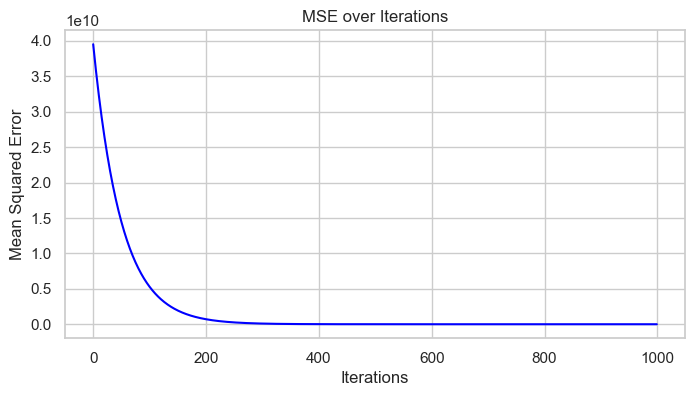

In [43]:
scale_grad_lin_reg.plot_mse()

In [44]:
# Это веса и смещение из формулы y = w1 * x1 + w2 * x2 + ... + wn * xn + b в градиентном спуске
scale_grad_lin_reg.weights, scale_grad_lin_reg.bias

(array([ 18709.312375  ,   5696.6678261 ,   1010.92249002,   -796.1368433 ,
           367.36370209,  -2991.87693082, -10777.31622521,   7435.9320353 ]),
 197328.98069396408)

In [45]:
# Это веса и смещение из формулы y = w1 * x1 + w2 * x2 + ... + wn * xn + b в аналитическом решении
coefficients

array([99923.35609891,  1001.52848762,  4975.63260379,  2052.95350126,
        -418.30732326,   307.08997871,  -101.14978179, -1998.03235132,
       15055.92534502])

In [46]:
from sklearn.metrics import mean_squared_error

print("Аналитическое решение:", mean_squared_error(y_test, y_pred_anal))
print("Градиентный спуск:", mean_squared_error(y_test, y_grad_pred))

Аналитическое решение: 86030.3157437775
Градиентный спуск: 250341.63585972902
